# credit crisis modeling on lending club
信用风险建模：PD, LGD, EAD

## 1. 加载数据

In [1]:
import pandas as pd
%matplotlib inline

In [2]:
# 查看目录下的文件，查询数据文件名
!ls ..

code_backup				      LCDataDictionary.xlsx
code_my					      loan.csv
datasets_680898_1195636_Data_Dictionary.xlsx  loan_data_2007_2014.csv


In [3]:
# 加载数据文件
df_bk = pd.read_csv('../loan_data_2007_2014.csv')
# 查看数据的各列基本情况
df_bk.info()

/home/ligy/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [4]:
# 每列的意义
# 从以下稍有不同的数据集描述中筛选出本数据集的描述
pd.set_option('max_colwidth', 400) # 全部显示，不省略显示字符串
col_name = pd.read_excel('../datasets_680898_1195636_Data_Dictionary.xlsx')
cols = df_bk.columns
col_names = pd.DataFrame(columns=['LoanStatNew', 'Description'])
for i, col in enumerate(cols):
    if col in list(col_name.LoanStatNew):
        col_names.loc[i, 'Description'] = col_name[col_name.LoanStatNew == col]['Description'].values[0]
        col_names.loc[i, 'LoanStatNew'] = col_name[col_name.LoanStatNew == col]['LoanStatNew'].values[0]
col_names.reset_index(drop=True, inplace=True)
col_names

,LoanStatNew,Description
0,id,A unique LC assigned ID for the loan listing.
1,member_id,A unique LC assigned Id for the borrower member.
2,loan_amnt,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
3,funded_amnt,The total amount committed to that loan at that point in time.
4,funded_amnt_inv,The total amount committed by investors for that loan at that point in time.
...,...,...
67,max_bal_bc,Maximum current balance owed on all revolving accounts
68,all_util,Balance to credit limit on all trades
69,inq_fi,Number of personal finance inquiries
70,total_cu_tl,Number of finance trades


In [5]:
# 英文描述
col_names.Description.values

array(['A unique LC assigned ID for the loan listing.',
       'A unique LC assigned Id for the borrower member.',
       'The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.',
       'The total amount committed to that loan at that point in time.',
       'The total amount committed by investors for that loan at that point in time.',
       'The number of payments on the loan. Values are in months and can be either 36 or 60.',
       'Interest Rate on the loan',
       'The monthly payment owed by the borrower if the loan originates.',
       'LC assigned loan grade', 'LC assigned loan subgrade',
       'The job title supplied by the Borrower when applying for the loan.*',
       'Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. ',
       'The home ownership status provided by the borro

In [6]:
# 翻译成中文
Description_CN = ['贷款清单的唯一LC分配ID',
                  '为借款人成员分配的唯一信用证ID',
                  '借款人申请的贷款清单金额如果信贷部门在某个时间点减少了贷款额,那么它将反映在该值中',
                  '在该时间点对该贷款的承诺总额',
                  '投资者在该时间点对该贷款的承诺总额',
                  '贷款的还款数量值以月为单位,可以是36或60',
                  '贷款利率',
                  '如果产生贷款,则借款人每月要还款',
                  'LC指定的贷款等级',
                  'LC指定的贷款子等级',
                  '借款人在申请贷款时提供的职位',
                  '就业年限可能的值在0到10之间,其中0表示少于一年,而10表示十年或更长时间 ',
                  '借方在注册过程中提供的房屋所有权状态我们的值是：租金,自有,抵押,其他',
                  '借款人在注册期间提供的自我报告的年收入',
                  '表明收入是否已由LC核实,未核实,或收入来源是否已核实',
                  '贷款融资的月份',
                  '贷款的当前状态',
                  '指示是否已为贷款制定了付款计划',
                  '具有列表数据的LC页面的URL',
                  '借款人提供的贷款说明',
                  '借款人为贷款申请提供的类别 ',
                  '借款人提供的贷款名称',
                  '借款人在贷款申请中提供的邮政编码的前3个数字',
                  '借款人在贷款申请中提供的状态',
                  '用借款人每月偿还的债务总额与债务总额（不包括抵押和所要求的信用证贷款）的比率除以借款人的自我报告的每月收入得出的比率',
                  '过去两年来,借方贷方档案中逾期30天以上的逾期欠款的次数',
                  '借款人最早报告的信用额度开放的月份',
                  '过去6个月的查询数量（不包括汽车和抵押贷款查询）',
                  '自借款人上次拖欠债务以来的月数',
                  '自上次公开记录以来的月数',
                  '借款人的信用档案中未清信用额度的数目',
                  '贬损的公共记录数量',
                  '信贷周转总额',
                  '循环线利用率,或借款人相对于所有可用循环信贷所使用的信贷量',
                  '当前在借款人的信用档案中的信用额总数',
                  '贷款的初始上市状态可能的值为– W,F',
                  '剩余未偿还本金总额,',
                  '剩余未偿还本金占投资者出资总额的一部分',
                  '迄今已收到的已付款总额的款项',
                  '迄今为止已收到的由投资者资助的部分款项',
                  '迄今为止收到的本金',
                  '迄今为止收到的利息',
                  '迄今为止已收的滞纳金',
                  '从总回收中扣除后的费用',
                  '过帐后收取收款费',
                  '已收到上个月的付款',
                  '最后收到的总付款额',
                  '下一个预定的付款日期',
                  '最近一个月信用证为这笔贷款取消了信用',
                  ' 12个月内不包括医学收藏的收藏数量',
                  '自最近90天或更差的评分以来的月份',
                  '公开提供的policy_code = 1 \ n新产品没有公开提供的policy_code = 2',
                  '表明贷款是个人申请还是与两个共同借款人共同申请',
                  '共同借款人在注册期间提供的自我报告的合并年收入',
                  '用同借款人每月总付款额除债务和所要求的信用证贷款外的债务总额计算的比率除以同借款人自行报告的月总收入之比',
                  '借款人现在拖欠的帐户数量',
                  '曾经拖欠的托收总额',
                  '所有帐户的当前总余额',
                  '过去6个月的未平仓交易数量',
                  '当前活跃的分期付款交易数',
                  '过去12个月内开设的分期付款帐户数',
                  '过去24个月内开设的分期付款帐户数',
                  '自最近的分期付款帐户开设以来的月份',
                  '所有分期付款帐户的当前总余额',
                  '当前总余额与所有安装帐户的最高信用/信用额度之比',
                  '过去12个月内开立的循环交易数',
                  '过去24个月内开立的循环交易数',
                  '所有循环帐户上的最大当前余额',
                  '平衡所有交易的信用额度',
                  '个人理财查询数量',
                  '金融交易数量',
                  '过去12个月中的信用查询数量'
]
len(Description_CN), len(col_names)

(72, 72)

In [7]:
# 将英文与中文翻译对应起来
col_names = col_names.reset_index(drop=True)
col_names['Description_CN'] = pd.Series(Description_CN)
col_names

,LoanStatNew,Description,Description_CN
0,id,A unique LC assigned ID for the loan listing.,贷款清单的唯一LC分配ID
1,member_id,A unique LC assigned Id for the borrower member.,为借款人成员分配的唯一信用证ID
2,loan_amnt,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.","借款人申请的贷款清单金额如果信贷部门在某个时间点减少了贷款额,那么它将反映在该值中"
3,funded_amnt,The total amount committed to that loan at that point in time.,在该时间点对该贷款的承诺总额
4,funded_amnt_inv,The total amount committed by investors for that loan at that point in time.,投资者在该时间点对该贷款的承诺总额
...,...,...,...
67,max_bal_bc,Maximum current balance owed on all revolving accounts,所有循环帐户上的最大当前余额
68,all_util,Balance to credit limit on all trades,平衡所有交易的信用额度
69,inq_fi,Number of personal finance inquiries,个人理财查询数量
70,total_cu_tl,Number of finance trades,金融交易数量


In [8]:
# 数据头
pd.options.display.max_columns = None # 显示全部列，不压缩显示
pd.set_option('max_colwidth', 20)
df_bk.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lend...,Borrower added...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lend...,Borrower added...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lend...,NaN,small_business,real estate busi...,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lend...,Borrower added...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medic...,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lend...,Borrower added...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# 去掉id变量
df = df_bk.iloc[:, 3:].copy()
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lend...,Borrower added...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lend...,Borrower added...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lend...,NaN,small_business,real estate busi...,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lend...,Borrower added...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medic...,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lend...,Borrower added...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2. 预处理数据

### 2.1 总体分析

In [10]:
# 丢弃空变量前尺寸
df.shape

(466285, 72)

In [11]:
cols = [x for x in list(df.columns) if int(df[x].count()) is 0] # 找到空列的名称，存到list中
df.drop(labels=cols, inplace=True, axis=1) # 丢弃空列
df.shape # 检查结果

(466285, 55)

In [12]:
df.acc_now_delinq.isna().sum()

29

- 生成数据集的描述性报告

In [13]:
# import pandas_profiling
# pfr = pandas_profiling.ProfileReport(df)
# pfr.to_file('df_report.html')

![overiew](images/df_overiew.png)

In [14]:
# drop_cols = ['application_type', 'funded_amnt', 'funded_amnt_inv', 'installment', 
#              'out_prncp_inv', 'policy_code', 'total_pymnt_inv', 'total_rec_prncp']
# df.drop(labels=drop_cols, inplace=True, axis=1) # 丢弃高度相关的变量，和常数变量
# df.shape

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 55 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    466285 non-null  int64  
 1   funded_amnt                  466285 non-null  int64  
 2   funded_amnt_inv              466285 non-null  float64
 3   term                         466285 non-null  object 
 4   int_rate                     466285 non-null  float64
 5   installment                  466285 non-null  float64
 6   grade                        466285 non-null  object 
 7   sub_grade                    466285 non-null  object 
 8   emp_title                    438697 non-null  object 
 9   emp_length                   445277 non-null  object 
 10  home_ownership               466285 non-null  object 
 11  annual_inc                   466281 non-null  float64
 12  verification_status          466285 non-null  object 
 13 

- 变量loan_amnt

In [16]:
df.loan_amnt.isna().sum()

0

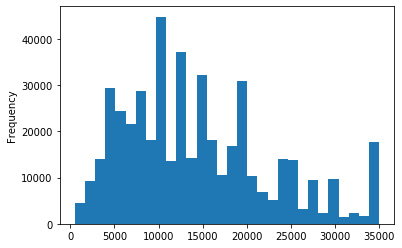

In [17]:
df.loan_amnt.plot(kind='hist', bins=30);

- 变量int_rate

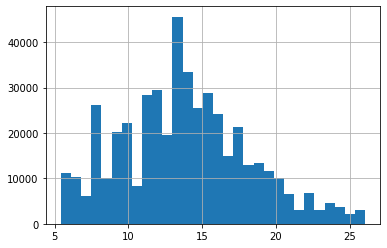

In [18]:
df.int_rate.hist(bins=30);

In [19]:
df.int_rate.isna().sum() # 空值个数

0

- 变量home_ownership

In [20]:
df.home_ownership.value_counts()

MORTGAGE    235875
RENT        188473
OWN          41704
OTHER          182
NONE            50
ANY              1
Name: home_ownership, dtype: int64

In [21]:
pd.set_option('max_colwidth', 60) # 字符串显示宽度
df.loc[0, :]

loan_amnt                                                                             5000
funded_amnt                                                                           5000
funded_amnt_inv                                                                       4975
term                                                                             36 months
int_rate                                                                             10.65
installment                                                                         162.87
grade                                                                                    B
sub_grade                                                                               B2
emp_title                                                                              NaN
emp_length                                                                       10+ years
home_ownership                                                                        RENT

In [22]:
df.loc[0, 'url']

'https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077501'

In [23]:
df.loc[0, 'desc']

'  Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>'

### 2.2 检查缺失值、清理数据

In [24]:
df.shape

(466285, 55)

In [25]:
def chk_na(df=df):
    '''
    查看各变量缺失值情况
    '''
    # pd.options.display.max_rows = None
    # pd.set_option('max_colwidth', 0) # 字符串显示宽度
    na = pd.DataFrame()
    na['na_num'] = df.isna().sum()
    na['na_percentage(%)'] = round(df.isna().sum()/len(df) * 100)
    na_type = [type(df.loc[0, x]) for x in na.index]
    na['na_types'] = na_type
    na = na[~(na.na_num  == 0)]
    # 提取na的变量中文翻译
    a = col_names.LoanStatNew.apply(lambda x: True if x in list(na.index) else False)
    b = col_names[a==True]
    c = b.set_index('LoanStatNew') # 将LoanStatNew作为索引
    # 将中文翻译合并进na中
    na = pd.concat([na, c.Description_CN], axis=1)
#     print(na.shape)
    return na

In [26]:
na = chk_na(df)
na

,na_num,na_percentage(%),na_types,Description_CN
emp_title,27588,6.0,<class 'float'>,借款人在申请贷款时提供的职位
emp_length,21008,5.0,<class 'str'>,"就业年限可能的值在0到10之间,其中0表示少于一年,而10表示十年或更长时间"
annual_inc,4,0.0,<class 'numpy.float64'>,借款人在注册期间提供的自我报告的年收入
desc,340302,73.0,<class 'str'>,借款人提供的贷款说明
title,20,0.0,<class 'str'>,借款人提供的贷款名称
delinq_2yrs,29,0.0,<class 'numpy.float64'>,"过去两年来,借方贷方档案中逾期30天以上的逾期欠款的次数"
earliest_cr_line,29,0.0,<class 'str'>,借款人最早报告的信用额度开放的月份
inq_last_6mths,29,0.0,<class 'numpy.float64'>,过去6个月的查询数量（不包括汽车和抵押贷款查询）
mths_since_last_delinq,250351,54.0,<class 'numpy.float64'>,自借款人上次拖欠债务以来的月数
mths_since_last_record,403647,87.0,<class 'numpy.float64'>,自上次公开记录以来的月数


In [27]:
# 查看尺寸
na.shape

(23, 4)

In [28]:
# # 显示变量名中包含tot的翻译列表
# pd.options.display.max_rows = 80
# col_names[col_names.LoanStatNew.str.contains('tot')]

#### 2.2.1. 统一丢弃缺失值个数小于总数1%的行

In [29]:
drop_col = [x for x in na.index if na['na_percentage(%)'][x] < 1]
df.dropna(subset=drop_col, inplace=True)
na = chk_na()
na

,na_num,na_percentage(%),na_types,Description_CN
emp_title,27507,6.0,<class 'float'>,借款人在申请贷款时提供的职位
emp_length,20969,5.0,<class 'str'>,"就业年限可能的值在0到10之间,其中0表示少于一年,而10表示十年或更长时间"
desc,339788,73.0,<class 'str'>,借款人提供的贷款说明
mths_since_last_delinq,249916,54.0,<class 'numpy.float64'>,自借款人上次拖欠债务以来的月数
mths_since_last_record,402935,87.0,<class 'numpy.float64'>,自上次公开记录以来的月数
next_pymnt_d,226580,49.0,<class 'float'>,下一个预定的付款日期
mths_since_last_major_derog,366575,79.0,<class 'numpy.float64'>,自最近90天或更差的评分以来的月份
tot_coll_amt,69917,15.0,<class 'numpy.float64'>,曾经拖欠的托收总额
tot_cur_bal,69917,15.0,<class 'numpy.float64'>,所有帐户的当前总余额
total_rev_hi_lim,69917,15.0,<class 'numpy.float64'>,NaN


剩余的变量缺失值怎么处理？
- 直接丢弃变量
- 丢弃各变量的缺失行
- 补全策略：
  + 风险管理的保守估计
  + 决策树拟合

#### 2.2.2 total_rev_hi_lim清理

In [30]:
# 用funded_amnt来补全total_rev_hi_lim变量的缺失值
df.total_rev_hi_lim = df.total_rev_hi_lim.fillna(df.funded_amnt)
df.total_rev_hi_lim.isna().sum() # 查看空值个数

0

#### 2.2.3 annual_inc清理

In [31]:
# annual_inc变量没有缺失值
df.annual_inc.isna().sum()

0

#### 2.2.4 emp_title清理

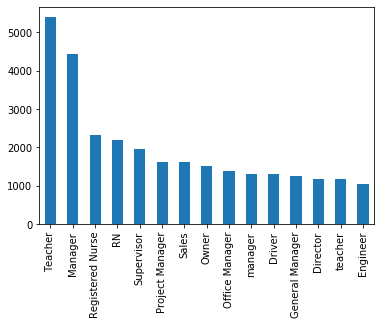

In [32]:
# 查看emp_title变量的分布情况
df_bk.emp_title.value_counts()[df_bk.emp_title.value_counts()> 1000].plot(kind='bar');

In [33]:
df.emp_title.isna().sum()

27507

#### 2.2.5 acc_now_delinq清理

In [34]:
# 取得此变量的描述
col_names[col_names.LoanStatNew=='acc_now_delinq']

,LoanStatNew,Description,Description_CN
55,acc_now_delinq,The number of accounts on which the borrower is now deli...,借款人现在拖欠的帐户数量


In [35]:
df.acc_now_delinq.isna().sum()

0

In [36]:
df.acc_now_delinq.value_counts()

0.0    463674
1.0      1619
2.0        92
3.0        11
4.0         4
5.0         2
Name: acc_now_delinq, dtype: int64

In [37]:
# # 以平均值补全
# df.acc_now_delinq.fillna(df.acc_now_delinq.mean(), inplace=True)
# df.acc_now_delinq.isna().sum()

#### 2.2.6 annual_inc清理

In [38]:
# ?pd.DataFrame.dropna

In [39]:
# 只有4个缺失值，丢弃缺失的行
# df.dropna(subset=['annual_inc'], inplace=True)
df.annual_inc.isna().sum()

0

#### 2.2.7 delinq_2yrs清理

In [40]:
# df.dropna(subset=['delinq_2yrs'], inplace=True)
df.delinq_2yrs.isna().sum()

0

## 3. 定义PD模型的因变量

PD模型的因变量为是否违约，存储在loan_status变量中

In [41]:
# 查看loan_status变量的所有可能取值
df.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [42]:
# 定义好顾客
good = ['Fully Paid', 'Current', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid']

In [43]:
# 坏顾客
bad = set(df.loan_status.unique()) - set(good)
bad

{'Charged Off',
 'Default',
 'Does not meet the credit policy. Status:Charged Off',
 'Late (31-120 days)'}

In [44]:
# 转化为二元的dummy变量
df['good_bad'] = df.loan_status.apply(lambda x: 1 if x in good else 0)

In [45]:
df.good_bad.value_counts()

1    414894
0     50508
Name: good_bad, dtype: int64

In [46]:
df.good_bad

0         1
1         0
2         1
3         1
4         1
         ..
466280    1
466281    0
466282    1
466283    1
466284    1
Name: good_bad, Length: 465402, dtype: int64

## 4. 分离测试集

In [47]:
# from sklearn.model_selection import train_test_split

In [48]:
# # 分离测试集
# loan_inputs_train, loan_inputs_test, loan_targets_train, loan_targets_test = train_test_split(
#     df.drop(labels=['good_bad'], axis=1), df.good_bad, test_size=0.2,
#     random_state=42)

In [49]:
# # 检查训练集和测试集大小
# loan_inputs_train.shape, loan_targets_train.shape, loan_inputs_test.shape, loan_targets_test.shape

## 5. 数据准备示例：简单离散变量grade

In [50]:
# # 将自变量与因变量备份，在临时变量上处理，这样可以在以后的测试集上使用相同的代码，只需要改名称即可
# df_inputs_prepr = loan_inputs_train.copy()
# df_targets_prepr = loan_targets_train.copy()

df_inputs_prepr = df.copy()
df_targets_prepr = df.good_bad.copy()

In [51]:
# 变量grade的基本情况
df_inputs_prepr.grade.value_counts()

B    136769
C    125081
D     76680
A     74775
E     35620
F     13178
G      3299
Name: grade, dtype: int64

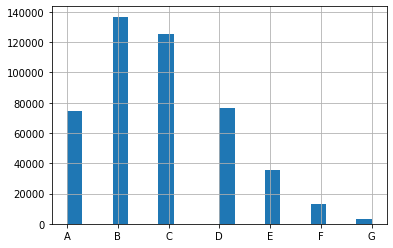

In [52]:
# 数量分布
df_inputs_prepr.grade.sort_values().hist(bins=20);

In [53]:
# 将要处理的自变量与因变量合并起来，方便理解
df1 = pd.concat([df_inputs_prepr.grade, df_targets_prepr], axis=1)
df1.sample(5)

,grade,good_bad
70235,A,1
37706,C,1
255369,D,1
288489,A,1
95391,B,1


In [54]:
# 数据中没有缺失值
df1.isna().sum()

grade       0
good_bad    0
dtype: int64

### 5.1 计算WoE和IV

In [55]:
# 统计每个grade有多少个客户
df2 = df1.groupby('grade', as_index=False).count()
df2

,grade,good_bad
0,A,74775
1,B,136769
2,C,125081
3,D,76680
4,E,35620
5,F,13178
6,G,3299


In [56]:
df2.good_bad.sum()

465402

In [57]:
len(df_targets_prepr)

465402

每个grade的客户数量之和确实与总客户数是相等的。注意：在groupby的时候，不能使用sum()，要使用count()

In [58]:
# 重新定义列名称
df2.columns = ['grade', 'n_obs']
df2

,grade,n_obs
0,A,74775
1,B,136769
2,C,125081
3,D,76680
4,E,35620
5,F,13178
6,G,3299


In [59]:
df3 = df1.groupby('grade', as_index=False).sum() # 计算good客户数量
df2 = pd.concat([df2, df3], axis=1) # 合并到原数据中
df2 = df2.iloc[:, [0, 1, 3]] # 去掉重复的grade列
df2.columns = ['grade', 'n_obs', 'n_good']
df2

,grade,n_obs,n_good
0,A,74775,71902
1,B,136769,126078
2,C,125081,110805
3,D,76680,64953
4,E,35620,28746
5,F,13178,10020
6,G,3299,2390


In [60]:
# 计算bad客户数量
df2['n_bad'] = df2.n_obs - df2.n_good
df2

,grade,n_obs,n_good,n_bad
0,A,74775,71902,2873
1,B,136769,126078,10691
2,C,125081,110805,14276
3,D,76680,64953,11727
4,E,35620,28746,6874
5,F,13178,10020,3158
6,G,3299,2390,909


In [61]:
# 计算good客户比例
df2['prop_good'] = df2.n_good / df2.n_obs
df2

,grade,n_obs,n_good,n_bad,prop_good
0,A,74775,71902,2873,0.961578
1,B,136769,126078,10691,0.921832
2,C,125081,110805,14276,0.885866
3,D,76680,64953,11727,0.847066
4,E,35620,28746,6874,0.807019
5,F,13178,10020,3158,0.760358
6,G,3299,2390,909,0.724462


In [62]:
# 计算bad客户比例
df2['prop_bad'] = df2.n_bad / df2.n_obs
df2

,grade,n_obs,n_good,n_bad,prop_good,prop_bad
0,A,74775,71902,2873,0.961578,0.038422
1,B,136769,126078,10691,0.921832,0.078168
2,C,125081,110805,14276,0.885866,0.114134
3,D,76680,64953,11727,0.847066,0.152934
4,E,35620,28746,6874,0.807019,0.192981
5,F,13178,10020,3158,0.760358,0.239642
6,G,3299,2390,909,0.724462,0.275538


In [63]:
import numpy as np
df2['woe'] = np.log(df2.prop_good / df2.prop_bad)
df2

,grade,n_obs,n_good,n_bad,prop_good,prop_bad,woe
0,A,74775,71902,2873,0.961578,0.038422,3.219947
1,B,136769,126078,10691,0.921832,0.078168,2.467498
2,C,125081,110805,14276,0.885866,0.114134,2.049192
3,D,76680,64953,11727,0.847066,0.152934,1.711770
4,E,35620,28746,6874,0.807019,0.192981,1.430752
5,F,13178,10020,3158,0.760358,0.239642,1.154644
6,G,3299,2390,909,0.724462,0.275538,0.966704


In [64]:
df2['IV'] = ((df2.prop_good - df2.prop_bad) * df2.woe).sum()
df2

,grade,n_obs,n_good,n_bad,prop_good,prop_bad,woe,IV
0,A,74775,71902,2873,0.961578,0.038422,3.219947,9.737626
1,B,136769,126078,10691,0.921832,0.078168,2.467498,9.737626
2,C,125081,110805,14276,0.885866,0.114134,2.049192,9.737626
3,D,76680,64953,11727,0.847066,0.152934,1.711770,9.737626
4,E,35620,28746,6874,0.807019,0.192981,1.430752,9.737626
5,F,13178,10020,3158,0.760358,0.239642,1.154644,9.737626
6,G,3299,2390,909,0.724462,0.275538,0.966704,9.737626


信息值大于0.5时解释为可疑，上面的计算结果太大，应该是错的，问题在哪里？

原来是计算好/坏客户proportion时错误：
不是各组的好/坏客户在各组总人数中的比例，也不是其在总人数中的比例，而是在总好/坏客户人数中的比例！

In [65]:
# 计算good客户比例
df2['prop_good'] = df2.n_good / df2.n_good.sum()
df2

,grade,n_obs,n_good,n_bad,prop_good,prop_bad,woe,IV
0,A,74775,71902,2873,0.173302,0.038422,3.219947,9.737626
1,B,136769,126078,10691,0.303880,0.078168,2.467498,9.737626
2,C,125081,110805,14276,0.267068,0.114134,2.049192,9.737626
3,D,76680,64953,11727,0.156553,0.152934,1.711770,9.737626
4,E,35620,28746,6874,0.069285,0.192981,1.430752,9.737626
5,F,13178,10020,3158,0.024151,0.239642,1.154644,9.737626
6,G,3299,2390,909,0.005761,0.275538,0.966704,9.737626


In [66]:
# 计算bad客户比例
df2['prop_bad'] = df2.n_bad / df2.n_bad.sum()
df2

,grade,n_obs,n_good,n_bad,prop_good,prop_bad,woe,IV
0,A,74775,71902,2873,0.173302,0.056882,3.219947,9.737626
1,B,136769,126078,10691,0.303880,0.211669,2.467498,9.737626
2,C,125081,110805,14276,0.267068,0.282648,2.049192,9.737626
3,D,76680,64953,11727,0.156553,0.232181,1.711770,9.737626
4,E,35620,28746,6874,0.069285,0.136097,1.430752,9.737626
5,F,13178,10020,3158,0.024151,0.062525,1.154644,9.737626
6,G,3299,2390,909,0.005761,0.017997,0.966704,9.737626


In [67]:
df2['woe'] = np.log(df2.prop_good / df2.prop_bad)
df2

,grade,n_obs,n_good,n_bad,prop_good,prop_bad,woe,IV
0,A,74775,71902,2873,0.173302,0.056882,1.114056,9.737626
1,B,136769,126078,10691,0.303880,0.211669,0.361607,9.737626
2,C,125081,110805,14276,0.267068,0.282648,-0.056699,9.737626
3,D,76680,64953,11727,0.156553,0.232181,-0.394121,9.737626
4,E,35620,28746,6874,0.069285,0.136097,-0.675139,9.737626
5,F,13178,10020,3158,0.024151,0.062525,-0.951247,9.737626
6,G,3299,2390,909,0.005761,0.017997,-1.139188,9.737626


In [68]:
df2['IV'] = ((df2.prop_good - df2.prop_bad) * df2.woe).sum()
df2

,grade,n_obs,n_good,n_bad,prop_good,prop_bad,woe,IV
0,A,74775,71902,2873,0.173302,0.056882,1.114056,0.289283
1,B,136769,126078,10691,0.303880,0.211669,0.361607,0.289283
2,C,125081,110805,14276,0.267068,0.282648,-0.056699,0.289283
3,D,76680,64953,11727,0.156553,0.232181,-0.394121,0.289283
4,E,35620,28746,6874,0.069285,0.136097,-0.675139,0.289283
5,F,13178,10020,3158,0.024151,0.062525,-0.951247,0.289283
6,G,3299,2390,909,0.005761,0.017997,-1.139188,0.289283


信息值IV为0.29,解释为中等预测能力，在合理范围内。

### 5.2 定义计算woe和IV的函数

定义计算woe和IV的函数，以备后用

In [69]:
def woe_iv_discrete(df, xlabel, targets):
    df1 = pd.concat([df[xlabel], targets], axis=1) # 将自变量与因变量合并到同一个数据表中
    df2 = df1.groupby(xlabel, as_index=False).count() # 按自变量分组
    df2.columns = [xlabel, 'n_obs'] # 更新列名
#     print(df2)
    df3 = df1.groupby(xlabel, as_index=False).sum() # 计算good客户数量
    df2 = pd.concat([df2, df3], axis=1) # 合并到原数据中
    df2 = df2.iloc[:, [0, 1, 3]] # 去掉重复的grade列
    df2.columns = [xlabel, 'n_obs', 'n_good'] # 更新列名
    df2['n_bad'] = df2.n_obs - df2.n_good # 计算bad数量
    df2['prop_good'] = df2.n_good.apply(lambda x: x / df2.n_good.sum() if x is not 0 else (x+0.5) / df2.n_good.sum())# 计算good客户比例
    df2['prop_bad'] = df2.n_bad.apply(lambda x: x / df2.n_bad.sum() if x is not 0 else (x+0.5) / df2.n_bad.sum()) # 计算bad客户比例
    df2['woe'] = np.log(df2.prop_good / df2.prop_bad) # 计算woe
    df2 = df2.sort_values(by='woe', ascending=False) # 按woe降序，方便比较相邻组以合并
    df2['IV'] = ((df2.prop_good - df2.prop_bad) * df2.woe).sum() # 计算IV
    return df2

In [70]:
df_tmp = woe_iv_discrete(df_inputs_prepr, 'grade', df_targets_prepr)
df_tmp

,grade,n_obs,n_good,n_bad,prop_good,prop_bad,woe,IV
0,A,74775,71902,2873,0.173302,0.056882,1.114056,0.289283
1,B,136769,126078,10691,0.303880,0.211669,0.361607,0.289283
2,C,125081,110805,14276,0.267068,0.282648,-0.056699,0.289283
3,D,76680,64953,11727,0.156553,0.232181,-0.394121,0.289283
4,E,35620,28746,6874,0.069285,0.136097,-0.675139,0.289283
5,F,13178,10020,3158,0.024151,0.062525,-0.951247,0.289283
6,G,3299,2390,909,0.005761,0.017997,-1.139188,0.289283


检验得函数计算结果与上述相同，无误。

### 5.3 WoE的可视化

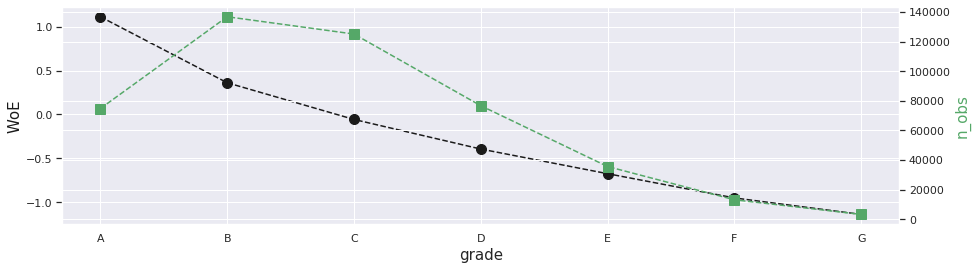

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
fig, ax1 = plt.subplots(figsize=(15,4))
ax1.set_xlabel("grade", fontsize=15)
ax1.set_ylabel("WoE",color='k', fontsize=15)
ax1.plot(df2.grade, df2.woe, '--', marker='o', markersize=10, color='k');
ax2 = ax1.twinx()
ax2.set_ylabel("n_obs",color='g', fontsize=15)
ax2.plot(df2.grade, df2.n_obs, '--', marker='s', markersize=10, color='g');

grade变量的各组分离性较好，不用合并，直接转化成dummy输入模型即可。

### 5.4 定义绘图函数，以备后用

In [178]:
def plot_woe(df, rotation=0):
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set()
    x = np.array(df.iloc[:, 0].apply(str))
    xlabel = df.columns[0]
    fig, ax1 = plt.subplots(figsize=(15,4))
    ax1.set_xlabel(xlabel, fontsize=15)
    plt.xticks(rotation=rotation)
    ax1.set_ylabel("WoE",color='r', fontsize=15)
    ax1.plot(x, df['woe'], '--', marker='o', markersize=10, color='r');
    ax2 = ax1.twinx()
    ax2.set_ylabel("n_obs",color='k', fontsize=15)
    ax2.plot(x, df['n_obs'], '--', marker='s', markersize=10, color='k');
    for a,b in zip(x,df['n_obs']):
        plt.text(a, b+0.15, '%d' % b, ha='left', va= 'bottom',fontsize=15, color='k')
    ax1.annotate('IV='+str(round(df.loc[0, 'IV'], 4)),
                 xy=(0.8, 0.85),xycoords='axes fraction',fontsize=20)

In [176]:
def plot_woe2(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    # Turns the values of the column with index 0 to strings, makes an array from these strings, and passes it to variable x.
    y = df_WoE['woe']
    # Selects a column with label 'WoE' and passes it to variable y.
    plt.figure(figsize=(18, 6))
    # Sets the graph size to width 18 x height 6.
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'r')
    # Plots the datapoints with coordiantes variable x on the x-axis and variable y on the y-axis.
    # Sets the marker for each datapoint to a circle, the style line between the points to dashed, and the color to black.
    plt.xlabel(df_WoE.columns[0])
    # Names the x-axis with the name of the column with index 0.
    plt.ylabel('Weight of Evidence', color='r', fontsize=15)
    # Names the y-axis 'Weight of Evidence'.
#     plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    # Names the grapth 'Weight of Evidence by ' the name of the column with index 0.
    plt.xticks(rotation = rotation_of_x_axis_labels, fontsize=15)
    # Rotates the labels of the x-axis a predefined number of degrees.
    ax2 = plt.twinx()
    ax2.set_ylabel("n_obs",color='k', fontsize=15)
    ax2.plot(x, df_WoE['n_obs'], '--', marker='s', markersize=10, color='k');
    for a,b in zip(x,df_WoE['n_obs']):
        plt.text(a, b+0.15, '%d' % b, ha='left', va= 'bottom',fontsize=15, color='k')
    ax1.annotate('IV='+str(round(df_WoE.loc[0, 'IV'], 4)),
                 xy=(0.8, 0.85),xycoords='axes fraction',fontsize=20)

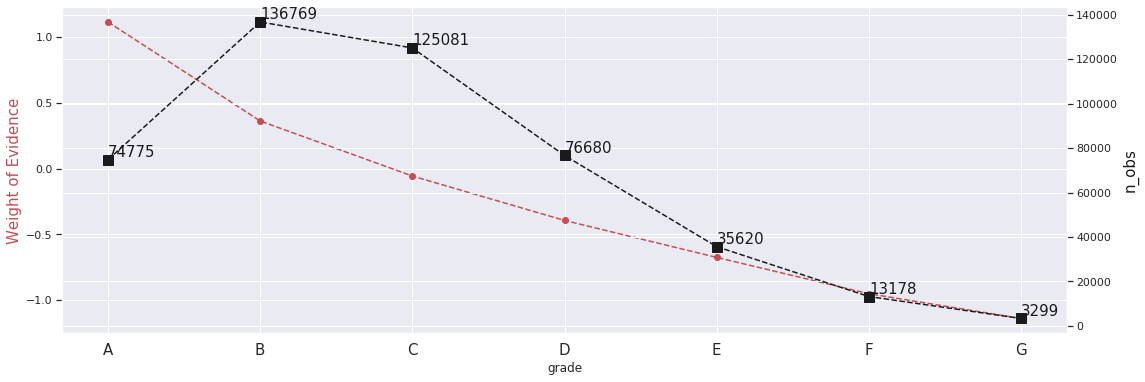

In [177]:
plot_woe2(df2)

In [75]:
# 将离散变量grade转换成dummy变量
df1 = pd.get_dummies(df.grade, prefix='grade:', prefix_sep=':')
df1

,grade::A,grade::B,grade::C,grade::D,grade::E,grade::F,grade::G
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
466280,0,0,1,0,0,0,0
466281,0,0,0,1,0,0,0
466282,0,0,0,1,0,0,0
466283,1,0,0,0,0,0,0


In [76]:
# 将dummy变量合并存在一个DataFrame中
df = pd.concat([df, df1], axis=1)

## 6. 一般的数据准备

### 6.1 处理离散变量

In [77]:
# # 共有8个离散变量需要处理
# cat_list = [#'grade', 
#             'sub_grade', 
#             'home_ownership', 
#             'verification_status', 
#             'loan_status', 
#             'purpose', 
#             'addr_state', 
#             'initial_list_status']

In [78]:
# # 将所有dummy变量存在一个list中
# dummies_list = [pd.get_dummies(df[x], prefix=x, prefix_sep=':') for x in cat_list]

In [79]:
# # 将上个list中的所有dummy变量合并存在一个DataFrame中
# loan_dummies = pd.concat(dummies_list, axis=1)

In [80]:
# # 检查这个DataFrame的尺寸
# loan_dummies.shape

In [81]:
# df.shape

In [82]:
# # 合并原始数据变量与dummy变量
# loan_data = pd.concat([df, loan_dummies], axis=1)

- 变量home_ownership

In [83]:
df.home_ownership.value_counts()

MORTGAGE    235539
RENT        188034
OWN          41604
OTHER          180
NONE            44
ANY              1
Name: home_ownership, dtype: int64

要注意：如果先分离测试集再转换，可能使得训练的模型与测试不一样！
应该转换完后再分离测试集，这样可以保证模型相同。

In [84]:
df_tmp = woe_iv_discrete(df, 'home_ownership', df.good_bad)
df_tmp

,home_ownership,n_obs,n_good,n_bad,prop_good,prop_bad,woe,IV
1,MORTGAGE,235539,213037,22502,0.513473,0.445514,0.141970,0.021019
4,OWN,41604,37144,4460,0.089526,0.088303,0.013762,0.021019
5,RENT,188034,164534,23500,0.396569,0.465273,-0.159775,0.021019
2,NONE,44,36,8,0.000087,0.000158,-0.601814,0.021019
3,OTHER,180,142,38,0.000342,0.000752,-0.787650,0.021019
0,ANY,1,1,0,0.000002,0.000010,-1.412744,0.021019


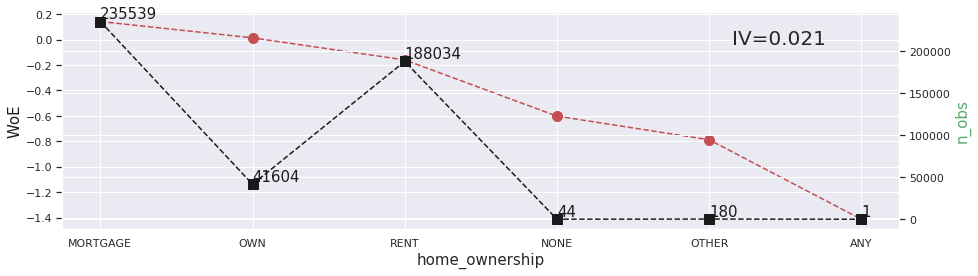

In [85]:
plot_woe(df_tmp)

IV值在0.02到0.1之间，预测能力弱

此处不用IV作为变量选择的方法，而用更高级的p值，即显著性检验。

观察woe和n_obs可知：{None, OTHER, ANY}分组应该被合并。合并的方法：可以将其dummy变量直接相加。

In [86]:
# 转换成dummy变量
df_tmp = pd.get_dummies(df.home_ownership, prefix='home_ownership', prefix_sep=':')

In [87]:
# 合并分组：直接将组对应的dummy相加
df_tmp['home_ownership:RENT_OTHER_NONE'] = sum([
    df_tmp['home_ownership:OTHER'],
    df_tmp['home_ownership:NONE'],
    df_tmp['home_ownership:ANY']
])

In [88]:
df_tmp.drop(labels=['home_ownership:OTHER', 'home_ownership:NONE', 'home_ownership:ANY'], axis=1)

,home_ownership:MORTGAGE,home_ownership:OWN,home_ownership:RENT,home_ownership:RENT_OTHER_NONE
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
466280,1,0,0,0
466281,1,0,0,0
466282,1,0,0,0
466283,0,1,0,0


In [89]:
# 合并dummy变量到原数据表
df = pd.concat([df, df_tmp], axis=1)

- verification_status变量

In [90]:
# 计算woe
df_tmp = woe_iv_discrete(df, 'verification_status', df.good_bad)
df_tmp

,verification_status,n_obs,n_good,n_bad,prop_good,prop_bad,woe,IV
0,Not Verified,147845,134083,13762,0.323174,0.272472,0.170657,0.021482
1,Source Verified,149765,134281,15484,0.323651,0.306565,0.054236,0.021482
2,Verified,167792,146530,21262,0.353175,0.420963,-0.175583,0.021482


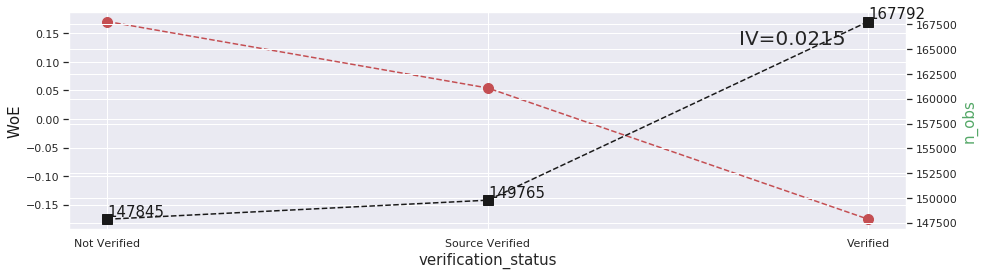

In [91]:
plot_woe(df_tmp)

不用合并分组

- loan_status变量，这是目标变量！

In [92]:
df_tmp = woe_iv_discrete(df, 'loan_status', df.good_bad)
df_tmp

,loan_status,n_obs,n_good,n_bad,prop_good,prop_bad,woe,IV
1,Current,224096,224096,0,0.540128,0.000010,10.907086,23.826674
5,Fully Paid,184524,184524,0,0.444750,0.000010,10.712791,23.826674
6,In Grace Period,3144,3144,0,0.007578,0.000010,6.640507,23.826674
4,Does not meet the credit policy. Status:Fully Paid,1913,1913,0,0.004611,0.000010,6.143684,23.826674
7,Late (16-30 days),1217,1217,0,0.002933,0.000010,5.691400,23.826674
3,Does not meet the credit policy. Status:Charged Off,725,0,725,0.000001,0.014354,-9.385210,23.826674
2,Default,832,0,832,0.000001,0.016473,-9.522871,23.826674
8,Late (31-120 days),6895,0,6895,0.000001,0.136513,-11.637590,23.826674
0,Charged Off,42056,0,42056,0.000001,0.832660,-13.445796,23.826674


In [93]:
df_tmp = pd.get_dummies(df.loan_status, prefix='loan_status', prefix_sep=':')
df = pd.concat([df, df_tmp], axis=1)

- purpose变量

In [94]:
df_tmp = woe_iv_discrete(df, 'purpose', df.good_bad)
df_tmp

,purpose,n_obs,n_good,n_bad,prop_good,prop_bad,woe,IV
1,credit_card,104053,95112,8941,0.229244,0.177021,0.258516,0.036032
0,car,5375,4904,471,0.011820,0.009325,0.237057,0.036032
6,major_purchase,9791,8870,921,0.021379,0.018235,0.159079,0.036032
4,home_improvement,26461,23890,2571,0.057581,0.050903,0.123274,0.036032
2,debt_consolidation,273815,242960,30855,0.585595,0.610893,-0.042293,0.036032
12,vacation,2476,2187,289,0.005271,0.005722,-0.082032,0.036032
13,wedding,2328,2056,272,0.004955,0.005385,-0.083176,0.036032
7,medical,4579,3978,601,0.009588,0.011899,-0.215952,0.036032
9,other,23549,20351,3198,0.049051,0.063317,-0.255287,0.036032
5,house,2262,1950,312,0.004700,0.006177,-0.273310,0.036032


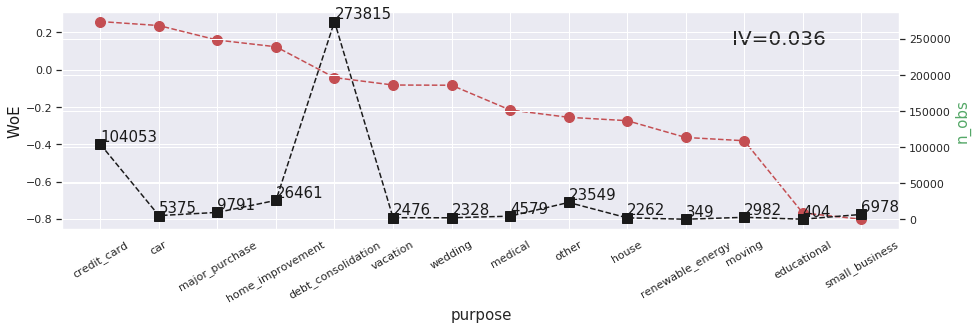

In [95]:
plot_woe(df_tmp, 30)

- 最后两个组合并成一个。edicational, small_business.
- 第一个为一组：credit_card（因为数量独大）
- 第二到四个合并成一个组：car, major_purchase, home_improvement.

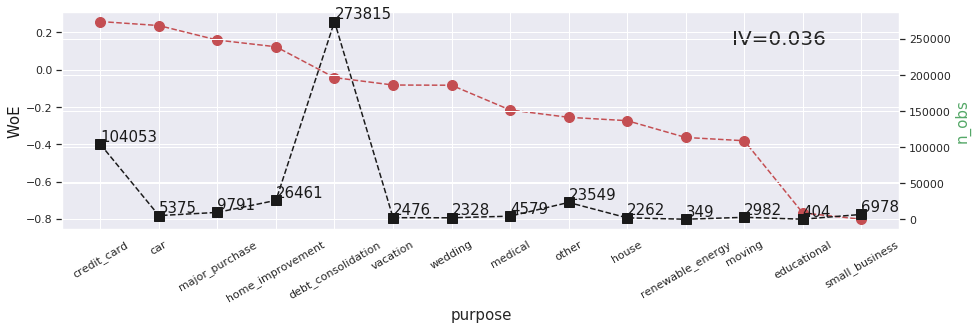

In [96]:
plot_woe(df_tmp, 30)

In [97]:
# df_tmp.iloc[4:-2, :]

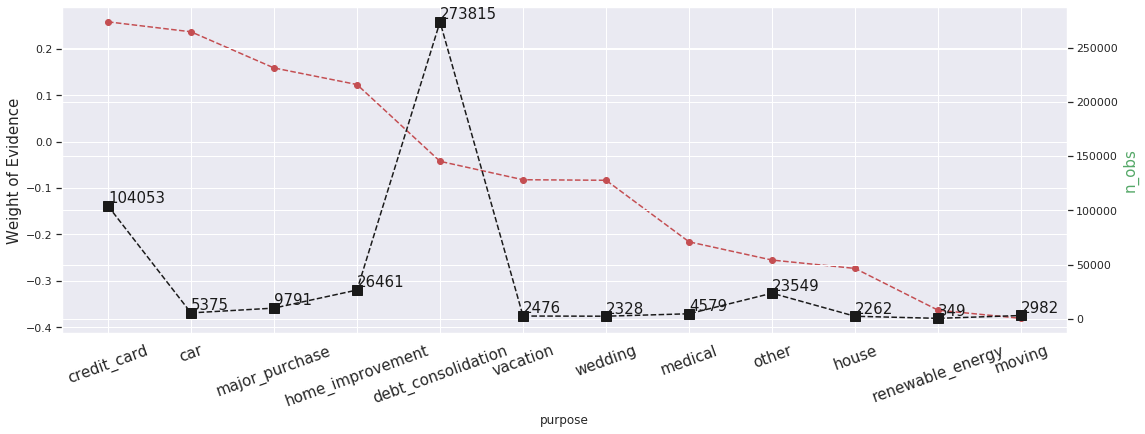

In [98]:
# 细致观察去掉极端值之后的曲线
# import warnings
# warnings.filterwarnings('ignore')
plot_woe2(df_tmp.iloc[:-2, :], 20);

- debt_consolidation一类
- 前两个一类：wedding, vacation
- 中间三个一类：medical, other, house
- 最后两个一类：renewable_energy, moving

In [99]:
# df_tmp = pd.get_dummies(df.purpose, prefix='purpose', prefix_sep=':') # 生成dummy变量
# concat_list = ['educational', 'small_business'] # 需要合并的组
# concat_list2 = ['purpose:'+x for x in concat_list] # 增加前缀
# df1 = df_tmp.loc[:, [x for x in df_tmp.columns if x in concat_list2]] # 提取要合并的组的列
# df['purpose:edu_small_business'] = df1.sum(axis=1) # 合并进原数据表

In [100]:
df_tmp = pd.get_dummies(df.purpose, prefix='purpose', prefix_sep=':') # 生成dummy变量

In [101]:
def combine_discrete(df_dummy, combine_list, prefix, prefix_sep=':'):
    '''
    合并dummy变量的给定列成一个DataFrame并返回
    '''
    combine_list2 = [prefix+prefix_sep+x for x in combine_list] # 增加前缀和分隔符
    df1 = df_dummy.loc[:, [x for x in df_dummy.columns if x in combine_list2]] # 提取要合并的组的列
    df = df1.sum(axis=1) # 合并分组
    return df

In [102]:
# concat_list = ['credit_card'] # 需要合并的组
# df['purpose:credit_card'] = combine_discrete(df_tmp, concat_list, 'purpose')

In [103]:
# concat_list = ['car', 'major_purchase', 'home_improvement'] # 需要合并的组
# df['purpose:car_major_purchase_home_improvement'] = combine_discrete(df_tmp, 
#                                                                      concat_list, 
#                                                                      'purpose')

In [104]:
# concat_list = ['debt_consolidation'] # 需要合并的组
# df['purpose:debt_consolidation'] = combine_discrete(df_tmp, concat_list, 'purpose')

In [105]:
# concat_list = ['wedding', 'vacation'] # 需要合并的组
# str1 = '_'.join(concat_list)
# df['purpose:wedding_vacation'] = combine_discrete(df_tmp, concat_list, 'purpose')
# # str1

In [106]:
# concat_list = ['medical', 'other', 'house'] # 需要合并的组
# str1 = 'purpose:'+'_'.join(concat_list)
# df[str1] = combine_discrete(df_tmp, concat_list, 'purpose')

In [107]:
# concat_list = ['renewable_energy', 'moving'] # 需要合并的组
# str1 = '_'.join(concat_list)
# df[str1] = combine_discrete(df_tmp, concat_list, 'purpose')

定义一个合并函数，以将上述过程一并进行。

In [108]:
combine_list = [['educational', 'small_business'], 
               ['credit_card'],
               ['car', 'major_purchase', 'home_improvement'],
               ['debt_consolidation'],
               ['wedding', 'vacation'],
               ['medical', 'other', 'house'],
               ['renewable_energy', 'moving']]

In [121]:
def concat_to_original(df, df_tmp, combine_list, prefix, prefix_sep=':'):
    for lists in combine_list:
        str1 = '_'.join(lists)
        df[prefix+prefix_sep+str1] = combine_discrete(df_tmp, lists, prefix, prefix_sep)
    return df

In [110]:
df = concat_to_original(df, df_tmp, 'purpose')

In [111]:
[x for x in df.columns if 'purpose:' in x]

['purpose:educational_small_business',
 'purpose:credit_card',
 'purpose:car_major_purchase_home_improvement',
 'purpose:debt_consolidation',
 'purpose:wedding_vacation',
 'purpose:medical_other_house',
 'purpose:renewable_energy_moving']

- initial_list_status变量

In [112]:
# 变量描述
col_names[col_names.LoanStatNew == 'initial_list_status']

,LoanStatNew,Description,Description_CN
35,initial_list_status,The initial listing status of the loan. Possible values ...,"贷款的初始上市状态可能的值为– W,F"


In [113]:
df_tmp = woe_iv_discrete(df, 'initial_list_status', df.good_bad)
df_tmp

,initial_list_status,n_obs,n_good,n_bad,prop_good,prop_bad,woe,IV
1,w,163077,148665,14412,0.35832,0.285341,0.227743,0.024482
0,f,302325,266229,36096,0.64168,0.714659,-0.107717,0.024482


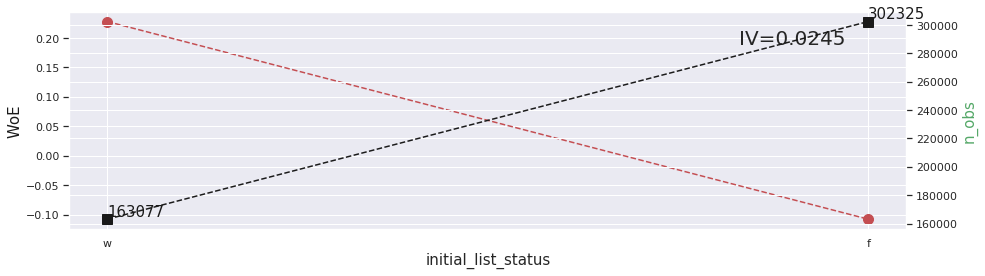

In [114]:
plot_woe(df_tmp)

不用合并分组，直接转换成dummy变量即可。

In [115]:
# 将dummy变量合并进原数据表
df = pd.concat([df, pd.get_dummies(df.initial_list_status, prefix='initial_list_status', prefix_sep=':')], axis=1)

- addr_state变量

In [116]:
df_tmp = woe_iv_discrete(df, 'addr_state', df.good_bad)
df_tmp

,addr_state,n_obs,n_good,n_bad,prop_good,prop_bad,woe,IV
7,DC,1422,1326,96,0.003196,0.001901,0.519683,0.012319
49,WY,1126,1043,83,0.002514,0.001643,0.425125,0.012319
48,WV,2409,2217,192,0.005344,0.003801,0.340524,0.012319
29,NH,2229,2045,184,0.004929,0.003643,0.302326,0.012319
13,ID,12,11,1,0.000027,0.000020,0.292004,0.012319
25,MS,1223,1119,104,0.002697,0.002059,0.269908,0.012319
45,VT,902,824,78,0.001986,0.001544,0.251570,0.012319
0,AK,1251,1142,109,0.002753,0.002158,0.243297,0.012319
16,KS,4183,3809,374,0.009181,0.007405,0.214975,0.012319
39,SC,5579,5072,507,0.012225,0.010038,0.197088,0.012319


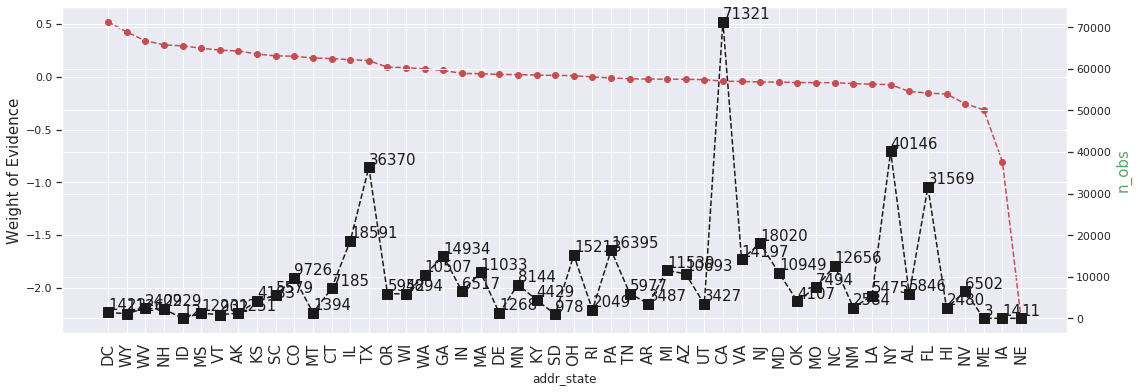

In [119]:
plot_woe2(df_tmp, 90)

KeyError: 0

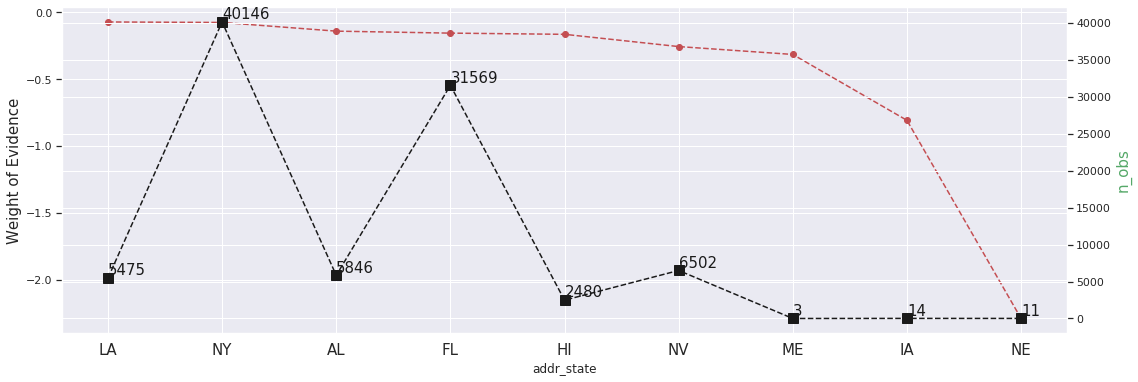

In [118]:
plot_woe2(df_tmp.iloc[-9:, :])

In [ ]:
plot_woe2(df_tmp.iloc[:8, :])

In [ ]:
plot_woe2(df_tmp.iloc[8:20, :])

In [ ]:
plot_woe2(df_tmp.iloc[20:-5, :])

In [ ]:
# # 我的分组
# combine_list = [['IA', 'NE'],
#               ['DC', 'WY', 'WV', 'NH'],
#               ['TX'],
#               ['KS', 'SC', 'CO', 'MT', 'CT', 'IL'],
#               ['OR', 'WI', 'WA', 'GA'],
#               ['MA', 'DE', 'MN', 'KY', 'SD', 'OH', 'RI', 'PA', 'TN', 'AR', 'MI',
#                'AZ', 'UT', 'CA', 'VA', 'NJ', 'MD', 'OK', 'MO', 'NC', 'NM', 'LA', 
#                'NY', 'AL', 'FL']]

In [125]:
combine_list = [['ND', 'NE', 'IA', 'NV', 'FL', 'HI', 'AL'],
                ['NM', 'VA'],
                ['NY'],
                ['OK', 'TN', 'MO', 'LA', 'MD', 'NC'],
                ['CA'],
                ['UT', 'KY', 'AZ', 'NJ'],
                ['AR', 'MI', 'PA', 'OH', 'MN'],
                ['RI', 'MA', 'DE', 'SD', 'IN'],
                ['GA', 'WA', 'OR'],
                ['WI', 'MT'],
                ['TX'],
                ['IL', 'CT'],
                ['KS', 'SC', 'CO', 'VT', 'AK', 'MS'],
                ['WV', 'NH', 'WY', 'DC', 'ME', 'ID']]

In [129]:
# 检查分组的数目是否一致，是否漏掉哪个州
sum([len(x) for x in combine_list])

51

In [134]:
# 释放嵌套列表
a = sum(combine_list, [])
len(a)

51

In [130]:
len(df_tmp)

50

竟然多出来一个！

In [136]:
# 多出来哪个州
set(a) - set(df_tmp.addr_state.values)

{'ND'}

In [126]:
# 调用函数将合并了的分组，再合并到原数据表中
df = concat_to_original(df, df_tmp, combine_list, 'addr_state')

In [127]:
# 检查合并结果
[x for x in df.columns if 'addr_state:' in x]

['addr_state:educational_small_business',
 'addr_state:credit_card',
 'addr_state:car_major_purchase_home_improvement',
 'addr_state:debt_consolidation',
 'addr_state:wedding_vacation',
 'addr_state:medical_other_house',
 'addr_state:renewable_energy_moving',
 'addr_state:ND_NE_IA_NV_FL_HI_AL',
 'addr_state:NM_VA',
 'addr_state:NY',
 'addr_state:OK_TN_MO_LA_MD_NC',
 'addr_state:CA',
 'addr_state:UT_KY_AZ_NJ',
 'addr_state:AR_MI_PA_OH_MN',
 'addr_state:RI_MA_DE_SD_IN',
 'addr_state:GA_WA_OR',
 'addr_state:WI_MT',
 'addr_state:TX',
 'addr_state:IL_CT',
 'addr_state:KS_SC_CO_VT_AK_MS',
 'addr_state:WV_NH_WY_DC_ME_ID']

### 6.2 处理连续变量

- 变量term

In [137]:
df.term.unique() # 多少个值

array([' 36 months', ' 60 months'], dtype=object)

In [138]:
df.term.isna().sum() # 空值个数

0

In [139]:
df['term'] = df.term.str.replace(' 36 months', str(36)) # 以月为单位
df['term'] = df.term.str.replace(' 60 months', str(60))

In [140]:
df.term = pd.to_numeric(df.term)

- 变量issue_d

In [141]:
pd.set_option('max_colwidth', 400)
col_names[col_names.LoanStatNew == 'issue_d']

,LoanStatNew,Description,Description_CN
15,issue_d,The month which the loan was funded,贷款融资的月份


In [142]:
df.issue_d.iloc[9239]

'Sep-11'

In [143]:
df['issue_d_date'] = pd.to_datetime(df.issue_d, format='%b-%y') # 转换成日期格式
df['issue_d_date'].iloc[9239] # 检查格式转换结果

Timestamp('2011-09-01 00:00:00')

In [144]:
# 将日期转换为到2017年12月1日的时间差，以月份为单位
import numpy as np
df['issue_d_diff'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df.issue_d_date) / np.timedelta64(1, 'M')))
df.issue_d_diff.describe() # 检查时间差转换结果

count    465402.000000
mean         51.222152
std          14.270816
min          36.000000
25%          41.000000
50%          47.000000
75%          57.000000
max         124.000000
Name: issue_d_diff, dtype: float64

- 变量emp_length

In [145]:
df.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [146]:
df.emp_length = df.emp_length.str.replace('10\+ years', str(10))
df.emp_length = df.emp_length.str.replace('< 1 year', str(0))
df.emp_length = df.emp_length.str.replace('nan', str(0))
df.emp_length = df.emp_length.str.replace(' years', '')
df.emp_length = df.emp_length.str.replace(' year', '')
df.emp_length = pd.to_numeric(df.emp_length)

In [147]:
df.emp_length.unique() # 检查结果

array([10.,  0.,  1.,  3.,  8.,  9.,  4.,  5.,  6.,  2.,  7., nan])

In [148]:
df.emp_length.isna().sum() # 查看空值个数

20969

In [149]:
df.emp_length.fillna(0, inplace=True) # 用0填充空值，是合理的，因为工作时长不填的一般没有工作或刚开始工作
df.emp_length.isna().sum() # 检查结果

0

- 变量earliest_cr_line

In [150]:
col_names[col_names.LoanStatNew == 'earliest_cr_line']

,LoanStatNew,Description,Description_CN
26,earliest_cr_line,The month the borrower's earliest reported credit line was opened,借款人最早报告的信用额度开放的月份


In [151]:
df.earliest_cr_line[:10]

0    Jan-85
1    Apr-99
2    Nov-01
3    Feb-96
4    Jan-96
5    Nov-04
6    Jul-05
7    Jan-07
8    Apr-04
9    Sep-04
Name: earliest_cr_line, dtype: object

In [152]:
df.earliest_cr_line.str.findall('-([4].)').value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1652, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[]      465397
[46]         2
[48]         1
[44]         1
[49]         1
Name: earliest_cr_line, dtype: int64

*转换方法：*
- 年份的范围是4几年到1几年
- 转换方法是：
  + 年份数字大于等于40的转换成19XX，如45转换成1945
  + 年份数字小于40的转换成20XX，如15转换成2015
  + 实际上没有2X年和3X年的数据

In [153]:
df.earliest_cr_line.isna().sum() # 统计空值的个数

0

- 处理缺失值的方法一：丢弃

In [154]:
# na_line = list(df[df.earliest_cr_line.notna()].index) # 得到非空行的index
# df = df.loc[na_line, :] # 删除29个earliest_cr_line列空值对应的行
# df.earliest_cr_line.isna().sum() # 检查去空值结果

- 处理缺失值的方法二：信用度量中的保守估计

In [155]:
# df.earliest_cr_line.fillna('Dec-2017', inplace=True) # 以Dec-2017补全，最保守估计

In [156]:
# 验证字符串搜索功能，返回值是否正确
import re
re.search(r'-[4-9].', 'Feb-94') is not None

True

In [157]:
# 验证字符串搜索功能，返回值是否正确
re.search(r'-[4-9].', 'Feb-06') is not None

False

In [158]:
# 按照上面的方案进行日期格式转换，年份由2位数变成4位数
df['earliest_cr_line_date']= df.earliest_cr_line.apply(
    lambda x: str(x)[:4]+'19'+str(x)[-2:] if re.search('-[4-9]', str(x)) is not None else x[:4]+'20'+x[-2:])

In [159]:
df.earliest_cr_line_date.sample(5)

252468    Dec-1997
132633    Dec-1983
252339    Nov-1989
226532    Oct-1992
282490    Jul-2000
Name: earliest_cr_line_date, dtype: object

In [160]:
# 变换成内置日期格式，并计算日期差
df['earliest_cr_line_diff'] = pd.to_datetime('2017-12-01') - pd.to_datetime(df.earliest_cr_line_date)

In [161]:
# 以月为单位
df['earliest_cr_line_diff'] = round(df.earliest_cr_line_diff / np.timedelta64(1, 'M'))

In [162]:
# 验证结果，值的范围合理
df.earliest_cr_line_diff.describe()

count    465402.000000
mean        242.507836
std          86.936019
min          73.000000
25%         184.000000
50%         226.000000
75%         285.000000
max         887.000000
Name: earliest_cr_line_diff, dtype: float64

### 6.2.1 处理有序离散变量（按连续变量处理）

In [163]:
def woe_iv_ordered_discrete(df, xlabel, targets):
    df1 = pd.concat([df[xlabel], targets], axis=1) # 将自变量与因变量合并到同一个数据表中
    df2 = df1.groupby(xlabel, as_index=False).count() # 按自变量分组
    df2.columns = [xlabel, 'n_obs'] # 更新列名
    df3 = df1.groupby(xlabel, as_index=False).sum() # 计算good客户数量
    df2 = pd.concat([df2, df3], axis=1) # 合并到原数据中
    df2 = df2.iloc[:, [0, 1, 3]] # 去掉重复的grade列
    df2.columns = [xlabel, 'n_obs', 'n_good'] # 更新列名
    df2['n_bad'] = df2.n_obs - df2.n_good # 计算bad数量
    df2['prop_good'] = df2.n_good.apply(lambda x: x / df2.n_good.sum() if x is not 0 else (x+0.5) / df2.n_good.sum())# 计算good客户比例
    df2['prop_bad'] = df2.n_bad.apply(lambda x: x / df2.n_bad.sum() if x is not 0 else (x+0.5) / df2.n_bad.sum()) # 计算bad客户比例
    df2['woe'] = np.log(df2.prop_good / df2.prop_bad) # 计算woe
    # 有序变量不能打乱顺序
    # df2 = df2.sort_values(by='woe', ascending=False) # 按woe降序，方便比较相邻组以合并
    df2['IV'] = ((df2.prop_good - df2.prop_bad) * df2.woe).sum() # 计算IV
    return df2

- term变量

In [179]:
df_tmp = woe_iv_ordered_discrete(df, 'term', df.good_bad)
df_tmp

,term,n_obs,n_good,n_bad,prop_good,prop_bad,woe,IV
0,36,337250,304794,32456,0.734631,0.642591,0.133859,0.039726
1,60,128152,110100,18052,0.265369,0.357409,-0.297759,0.039726


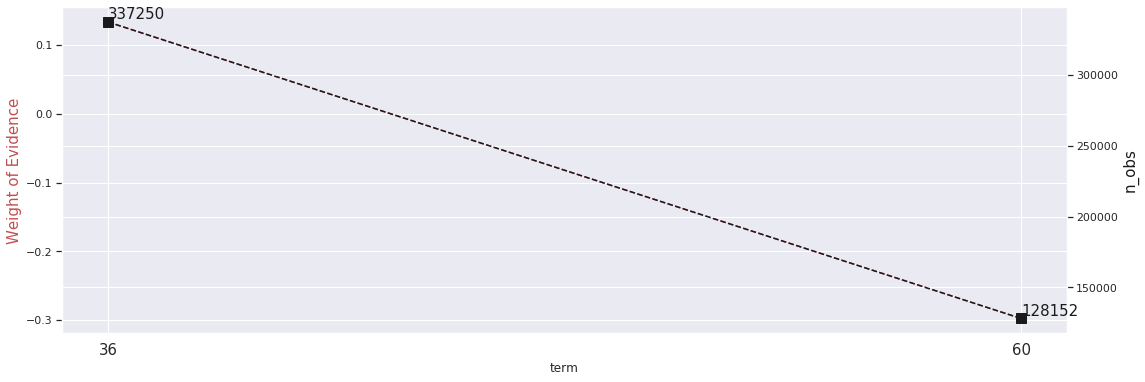

In [181]:
plot_woe2(df_tmp)

上图只能看到一条线是因为两条线恰好重合了！
不用合并分组，真接转换dummy进原数据表。

In [183]:
df_tmp = pd.get_dummies(df.term, prefix='term', prefix_sep=':')
df = pd.concat([df, df_tmp], axis=1)

### 6.2.2 处理有序连续变量